In [1]:
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from experiment_utils import wc_experiment, n_trial_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [2]:
data_path = "../Data/Water-Clusters"
mol_pair_list_path = os.path.join(data_path, 'list')
_molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
molecule_pairs = []
for nameA, nameB in _molecule_pairs:
    molecule_pairs.append((nameA+'.xyz', nameB+'.xyz'))

In [3]:
otmol_center_res = wc_experiment(molecule_pairs, data_path, dataset_name = 'ArbAlignDataWC', save = True, molecule_cluster_options='center', n_trials = 100)
otmol_oxygen_res = wc_experiment(molecule_pairs, data_path, dataset_name = 'ArbAlignDataWC', save = True, molecule_cluster_options='O', n_trials = 100)

The number of candidate molecular level permutations is 2
2-Cs-1.xyz 2-OpenC1.xyz emd 0.44 0.02s
The number of candidate molecular level permutations is 6
3-UUD.xyz 3-UUU.xyz emd 0.48 0.09s
The number of candidate molecular level permutations is 4
4-Ci.xyz 4-S4.xyz emd 0.49 0.09s
The number of candidate molecular level permutations is 15
5-CA-A.xyz 5-CA-B.xyz emd 0.76 0.10s
The number of candidate molecular level permutations is 21
6-BAG.xyz 6-BK-1.xyz emd 1.04 0.10s
The number of candidate molecular level permutations is 19
7-BI1.xyz 7-BI2.xyz emd 0.71 0.10s
The number of candidate molecular level permutations is 35
8-D2d.xyz 8-S4.xyz emd 0.61 0.10s
The number of candidate molecular level permutations is 41
9-D2dDD.xyz 9-S4DA.xyz emd 0.64 0.12s
The number of candidate molecular level permutations is 77
10-PP1.xyz 10-PP2.xyz emd 0.64 0.14s
The number of candidate molecular level permutations is 48
11-551A-1.xyz 11-551A-4.xyz emd 1.00 0.12s
The number of candidate molecular level permut

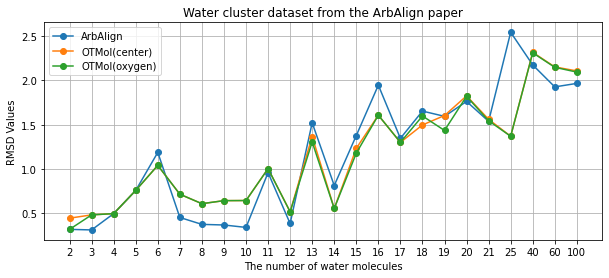

In [4]:
arbalign_res = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')
combined_df = pd.concat([
    otmol_center_res[['#', 'RMSD(OTMol)']].rename(columns={'RMSD(OTMol)': 'OTMol(center)'}),
    otmol_oxygen_res[['RMSD(OTMol)']].rename(columns={'RMSD(OTMol)': 'OTMol(oxygen)'}),
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol(center)", "OTMol(oxygen)"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.title("Water cluster dataset from the ArbAlign paper")
plt.xlabel("The number of water molecules") 
plt.ylabel("RMSD Values")
plt.legend()
plt.grid(True)

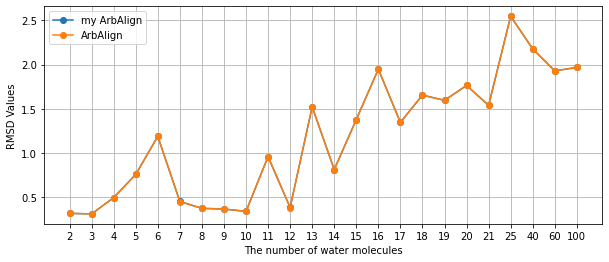

In [5]:
"""
# check the results computed on my laptop
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
my_arbalign_res = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')
combined_df = pd.concat([my_arbalign_res.rename(columns={'RMSD(ArbAlign)': 'my ArbAlign'}), arbalign_res.rename(columns={'RMSD(KM-ByAtomName)': 'ArbAlign'})], axis=1)
columns_to_plot = ["my ArbAlign", "ArbAlign"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
#plt.title("Water cluster dataset from the ArbAlign paper")
plt.xlabel("The number of water molecules") 
plt.ylabel("RMSD Values")
plt.legend()
plt.grid(True)
"""

The number of candidate molecular level permutations is 1
The number of candidate molecular level permutations is 2
The number of candidate molecular level permutations is 3
The number of candidate molecular level permutations is 4
The number of candidate molecular level permutations is 5
The number of candidate molecular level permutations is 6
The number of candidate molecular level permutations is 7
The number of candidate molecular level permutations is 8
The number of candidate molecular level permutations is 9
The number of candidate molecular level permutations is 10
The number of candidate molecular level permutations is 11
The number of candidate molecular level permutations is 12
The number of candidate molecular level permutations is 13
The number of candidate molecular level permutations is 14
The number of candidate molecular level permutations is 15
The number of candidate molecular level permutations is 16
The number of candidate molecular level permutations is 17
The nu

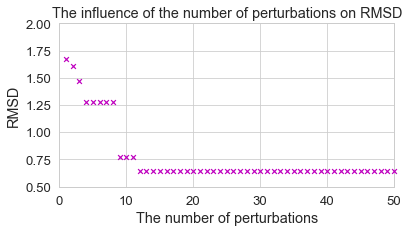

In [3]:
nameA, nameB = '10-PP1.xyz', '10-PP2.xyz'
n_trials_list = np.arange(1, 51, 1, dtype=int)
result = n_trial_experiment(data_path, nameA, nameB, n_trials_list=n_trials_list)
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1")
plt.figure(figsize=(6,3))
plt.scatter(
    result['n_trials'], 
    result['RMSD(OTMol)'], 
    marker='x',
    color='m',
    clip_on=False, 
    zorder=10)
plt.title('The influence of the number of perturbations on RMSD')
plt.xlim(0, 50)
plt.ylim(0.5, 2)
plt.xlabel('The number of perturbations')
plt.ylabel('RMSD')
plt.grid(True)
plt.savefig('../images/10-PP1_10-PP2_n_trials.png', dpi=300, bbox_inches='tight')

10-PP1, different n_trials

In [6]:
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 4
assignment = result['assignment'][i]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
print(result['RMSD(OTMol)'][i], result['n_trials'][i])
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=True)

1.2776902006554143 5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 20
assignment = result['assignment'][i]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
print(result['RMSD(OTMol)'][i], result['n_trials'][i])
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=True)

0.6384402177196827 21


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

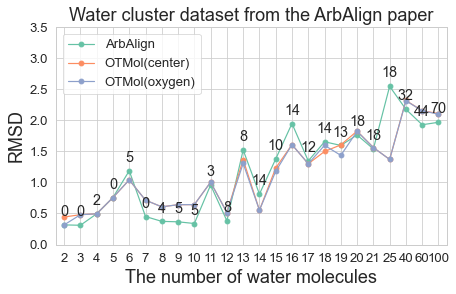

In [19]:
# Read the mismatch data
mismatch_df = pd.read_csv('./arbalign_output/ArbAlignData_mismatch_count.csv')

# Create the plot
arbalign_res = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')
combined_df = pd.concat([otmol_center_res[['#', 'RMSD(OTMol)']].rename(columns={'RMSD(OTMol)': 'OTMol(center)'}), 
                        otmol_oxygen_res[['RMSD(OTMol)']].rename(columns={'RMSD(OTMol)': 'OTMol(oxygen)'}), 
                        arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol(center)", "OTMol(oxygen)"] 
plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set2")
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['#'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                )      

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 23.5)
plt.title("Water cluster dataset from the ArbAlign paper", fontsize=18)
plt.xlabel("The number of water molecules", fontsize=18) 
plt.ylabel("RMSD", fontsize=18)
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)
plt.savefig('../images/WCArbAlignData.png', dpi=300, bbox_inches='tight')

In [5]:
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_res['assignment'][8]
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=True)

In [6]:
import numpy as np
data_path1 = "../Data/Water-Clusters"
data_path2 = "./arbalign_output"
nameA = '10-PP1.xyz'
nameB = '10-PP2-aligned_to-10-PP1.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path1, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path2, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(30))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=None, nameA=nameA, nameB=nameB, save=True)

The assignment is not provided. Assuming identity assignment.


Running time comparison

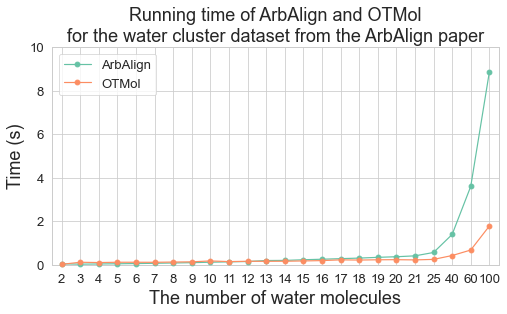

In [13]:
arbalign_time = pd.read_csv('./arbalign_output/no_reflection/ArbAlignDataWC_result.csv')[['time']]
otmol_res = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_center_results.csv')
combined_df = pd.concat([
    arbalign_time.rename(columns={'time': 'ArbAlign'}), 
    otmol_res.rename(columns={'time': 'OTMol'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set2")
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.ylim(0, 10)
plt.xlim(-0.5, 23.5)
plt.title("Running time of ArbAlign and OTMol\nfor the water cluster dataset from the ArbAlign paper", fontsize=18)
plt.xlabel("The number of water molecules", fontsize=18)
plt.ylabel("Time (s)", fontsize=18)
plt.legend()
plt.grid(True)
plt.savefig('../images/WCArbAlignData_time.png', dpi=300, bbox_inches='tight')

1st and 2nd lowest energy

In [5]:
group1_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_2nd"
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_1st_2nd_lowest_energy.csv')
group1_res = wc_experiment(
    zip(group1_info['Reference'], group1_info['Target']), 
    group1_data_path, 
    dataset_name = '1st2nd', 
    save = True,
    molecule_cluster_options='center',
    n_trials = 100,
    )

The number of candidate molecular level permutations is 6
Wat_3_cluster_0_1st_lowest.xyz Wat_3_cluster_1_2nd_lowest.xyz emd 1.49 0.09s
The number of candidate molecular level permutations is 24
Wat_4_cluster_2_1st_lowest.xyz Wat_4_cluster_3_2nd_lowest.xyz emd 0.95 0.10s
The number of candidate molecular level permutations is 25
Wat_5_cluster_12_1st_lowest.xyz Wat_5_cluster_13_2nd_lowest.xyz emd 0.13 0.11s
The number of candidate molecular level permutations is 4
Wat_6_cluster_31_1st_lowest.xyz Wat_6_cluster_32_2nd_lowest.xyz emd 0.69 0.09s
The number of candidate molecular level permutations is 25
Wat_7_cluster_137_1st_lowest.xyz Wat_7_cluster_138_2nd_lowest.xyz emd 0.78 0.10s
The number of candidate molecular level permutations is 26
Wat_8_cluster_607_1st_lowest.xyz Wat_8_cluster_608_2nd_lowest.xyz emd 0.61 0.11s
The number of candidate molecular level permutations is 30
Wat_9_cluster_1184_1st_lowest.xyz Wat_9_cluster_1185_2nd_lowest.xyz emd 0.58 0.11s
The number of candidate molecula

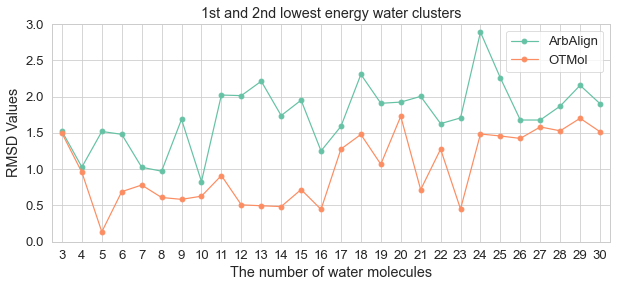

In [15]:
"""
arbalign_res = pd.read_csv('./arbalign_output/no_reflection/1st2ndWC_result.csv')
combined_df = pd.concat([group1_res.rename(columns={'RMSD(OTMol)':'OTMol'}), arbalign_res.rename(columns={'RMSD(ArbAlign)':'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 27.5)
plt.title("1st and 2nd lowest energy water clusters")
plt.xlabel("The number of water molecules")  
plt.ylabel("RMSD Values")
plt.ylim(0, 3)
plt.legend()
plt.grid(True)
"""

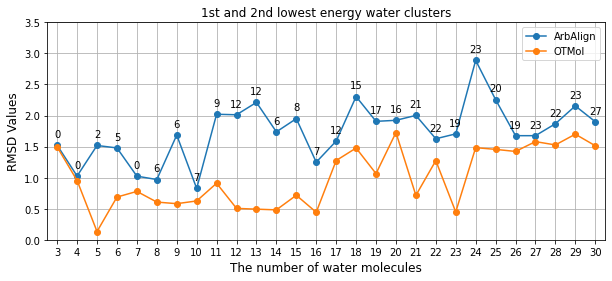

In [6]:
# Read the mismatch data
mismatch_df = pd.read_csv('./arbalign_output/no_reflection/1st2nd_mismatch_count.csv')
arbalign_res = pd.read_csv('./arbalign_output/no_reflection/1st2ndWC_result.csv')

# Create the plot
combined_df = pd.concat([group1_res[['#', 'RMSD(OTMol)']].rename(columns={'RMSD(OTMol)':'OTMol'}), 
                         arbalign_res[['RMSD(ArbAlign)']].rename(columns={'RMSD(ArbAlign)':'ArbAlign'})], axis=1)
                         
columns_to_plot = ["ArbAlign", "OTMol"]

plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['#'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                fontsize=10)      # Adjust font size as needed

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 27.5)
plt.title("1st and 2nd lowest energy water clusters")
plt.xlabel("The number of water molecules", fontsize=12) 
plt.ylabel("RMSD Values", fontsize=12)
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)
#plt.savefig('../images/WC1st2nd.png', dpi=300)

group2

In [7]:
group2_data_path = "../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_xyz_output_1st_to_20th"
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_largest_RMSD_pair_among_20_lowest_energy.csv')
group2_res = wc_experiment(
    zip(group2_info['Reference'], group2_info['Target']), 
    group2_data_path, 
    dataset_name = 'largest_rmsd', 
    save = True, 
    n_trials=100,
    molecule_cluster_options='center',
    )

The number of candidate molecular level permutations is 6
Wat_3_cluster_0_lowest_1.xyz Wat_3_cluster_1_lowest_2.xyz emd 1.49 0.10s
The number of candidate molecular level permutations is 16
Wat_4_cluster_2_lowest_1.xyz Wat_4_cluster_10_lowest_9.xyz emd 1.39 0.09s
The number of candidate molecular level permutations is 32
Wat_5_cluster_13_lowest_2.xyz Wat_5_cluster_22_lowest_11.xyz emd 0.88 0.16s
The number of candidate molecular level permutations is 21
Wat_6_cluster_42_lowest_12.xyz Wat_6_cluster_50_lowest_20.xyz emd 1.13 0.10s
The number of candidate molecular level permutations is 27
Wat_7_cluster_137_lowest_1.xyz Wat_7_cluster_147_lowest_11.xyz emd 0.97 0.10s
The number of candidate molecular level permutations is 19
Wat_8_cluster_615_lowest_9.xyz Wat_8_cluster_616_lowest_10.xyz emd 0.72 0.10s
The number of candidate molecular level permutations is 34
Wat_9_cluster_1184_lowest_1.xyz Wat_9_cluster_1195_lowest_12.xyz emd 0.77 0.11s
The number of candidate molecular level permutations

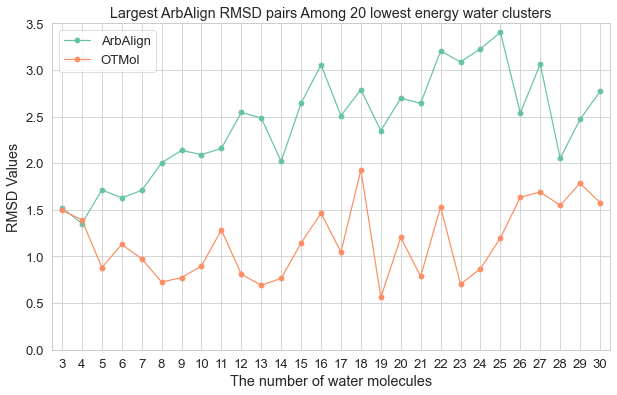

In [25]:
"""
arbalign_res = pd.read_csv('./arbalign_output/no_reflection/largest_RMSD_WC_result.csv')
combined_df = pd.concat([
    group2_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)
plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 27.5)
plt.title("Largest ArbAlign RMSD pairs Among 20 lowest energy water clusters")
plt.xlabel("The number of water molecules")  
plt.ylabel("RMSD Values")
plt.ylim(0, 3.5)
plt.legend()
plt.grid(True)
"""

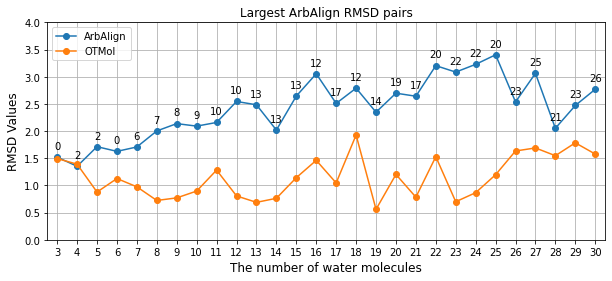

In [8]:
# Read the mismatch data
mismatch_df = pd.read_csv('./arbalign_output/no_reflection/largestRMSD_mismatch_count.csv')
arbalign_res = pd.read_csv('./arbalign_output/no_reflection/largest_RMSD_WC_result.csv')
# Create the plot
combined_df = pd.concat([
    group2_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'})], axis=1)
columns_to_plot = ["ArbAlign", "OTMol"]

plt.figure(figsize=(10, 4))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

# Add annotations for mismatched water molecules
for i, (x, y) in enumerate(zip(range(len(combined_df['#'])), combined_df['ArbAlign'])):
    mismatch_count = mismatch_df.iloc[i]['# mismatched water molecules']  # Adjust column name if different
    plt.annotate(f'{mismatch_count}', 
                (x, y),
                xytext=(0, 6),  # Offset the text k points upward
                textcoords='offset points',
                ha='center',     # Center the text horizontally
                va='bottom',     # Align text at the bottom
                fontsize=10)      # Adjust font size as needed

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.xlim(-0.5, 27.5)
plt.title("Largest ArbAlign RMSD pairs")
plt.xlabel("The number of water molecules", fontsize=12) 
plt.ylabel("RMSD Values", fontsize=12)
plt.ylim(0, 4)
plt.legend()
plt.grid(True)
#plt.savefig('../images/WClargestRMSD.png', dpi=300)

Comparison with the method that aligns oxygens first

In [ ]:
"""
old_arbalign_data_res = pd.read_csv('./otmol_output/old_ArbAlignData_res.csv')
combined_df = pd.concat([arbalign_res,otmol_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_arbalign_data_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['#'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['#'])), combined_df['#'])
plt.title("RMSD Comparison, ArbAlign Data, Center vs Oxygen")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.legend()
plt.grid(True)
"""

In [ ]:
"""
old_group1_res = pd.read_csv('./otmol_output/old_group1_res.csv')
combined_df = pd.concat([group1_info,group1_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_group1_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, WC Benchmark 1st to 20th, Center vs Oxygen")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
"""

In [ ]:
"""
old_group2_res = pd.read_csv('./otmol_output/old_group2_res.csv')
combined_df = pd.concat([group2_info,group2_res.rename(columns={'RMSD(OTMol)': 'Center'}), old_group2_res.rename(columns={'RMSD(otmol)': 'Oxygen'})], axis=1)
columns_to_plot = ["Center", "Oxygen"]

plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    plt.plot(range(len(combined_df['Wat_num'])), combined_df[column], marker='o', label=column)

plt.xticks(range(len(combined_df['Wat_num'])), combined_df['Wat_num'])
plt.title("RMSD Comparison, largest ArbAlign RMSD pair among 20 lowest energy, Center vs Oxygen")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
"""